<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
### <font color='blue'>Monitoramento de Criptomoedas em Tempo Real com Kafka, MongoDB e Streamlit</font>
### <font color='blue'>Criação de Visualizações com Dados do MongoDB</font>

In [1]:
!pip install -q watermark

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kafka
import pymongo
import streamlit
from pymongo import MongoClient
from configparser import RawConfigParser
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Carrega o arquivo de configuração
config_local = RawConfigParser()
config_local.read("config.conf")

['config.conf']

In [4]:
# Cria o cliente para o MongoDB
client = MongoClient(config_local['MongoDB']['url'])

In [5]:
# Usa o cliente para conectar ao banco de dados do MongoDB
db = client[config_local['MongoDB']['database']]

In [6]:
# Acessa a coleção (que é como uma tabela em um banco de dados relacional)
collection = db[config_local['MongoDB']['collection']]

In [7]:
# Cria a lista de controle
data_list = []

In [8]:
# Define a query
query = {"timestamp": 1, "data.name": 1, "data.priceUsd": 1, "_id": 0}

In [9]:
# Executa a query para retornar os documentos armazenados no MongoDB
documents = collection.find({}, query)

In [10]:
# Loop por cada documento para retornar os dados de interesse
for doc in documents:
    
    # Obtém o timestamp
    timestamp = doc.get("timestamp")
    
    # Se o documento tiver dados
    if "data" in doc:

        # Loop pelos itens
        for data_item in doc["data"]:
          
            # Adiciona os itens à lista de controle
            data_list.append({"timestamp": timestamp, 
                              "name": data_item["name"],
                              "price": round(float(data_item["priceUsd"]), 3)})

In [11]:
# Converte a lista em dataframe
df = pd.DataFrame(data_list)

In [12]:
# Visualiza as primeiras linhas
df.head(10)

,timestamp,name,price
0,2025-09-04 09:44:37,Bitcoin,110639.280
1,2025-09-04 09:44:37,Ethereum,4391.060
2,2025-09-04 09:44:37,XRP,2.836
3,2025-09-04 09:44:37,Tether USDt,1.000
4,2025-09-04 09:44:37,BNB,846.950
5,2025-09-04 09:44:37,Solana,207.320
6,2025-09-04 09:44:37,USDC,1.000
7,2025-09-04 09:44:37,Lido Staked ETH,4383.330
8,2025-09-04 09:44:37,Dogecoin,0.216
9,2025-09-04 09:44:37,TRON,0.338


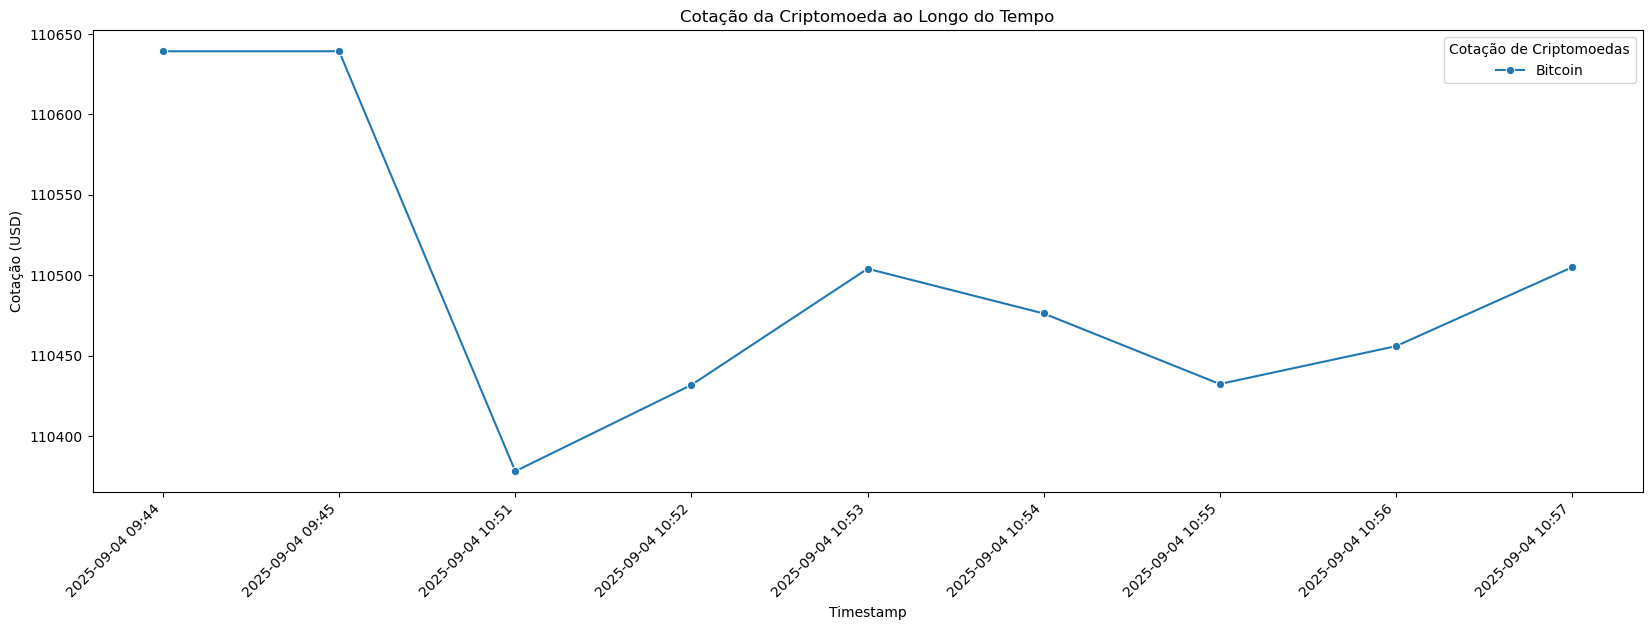

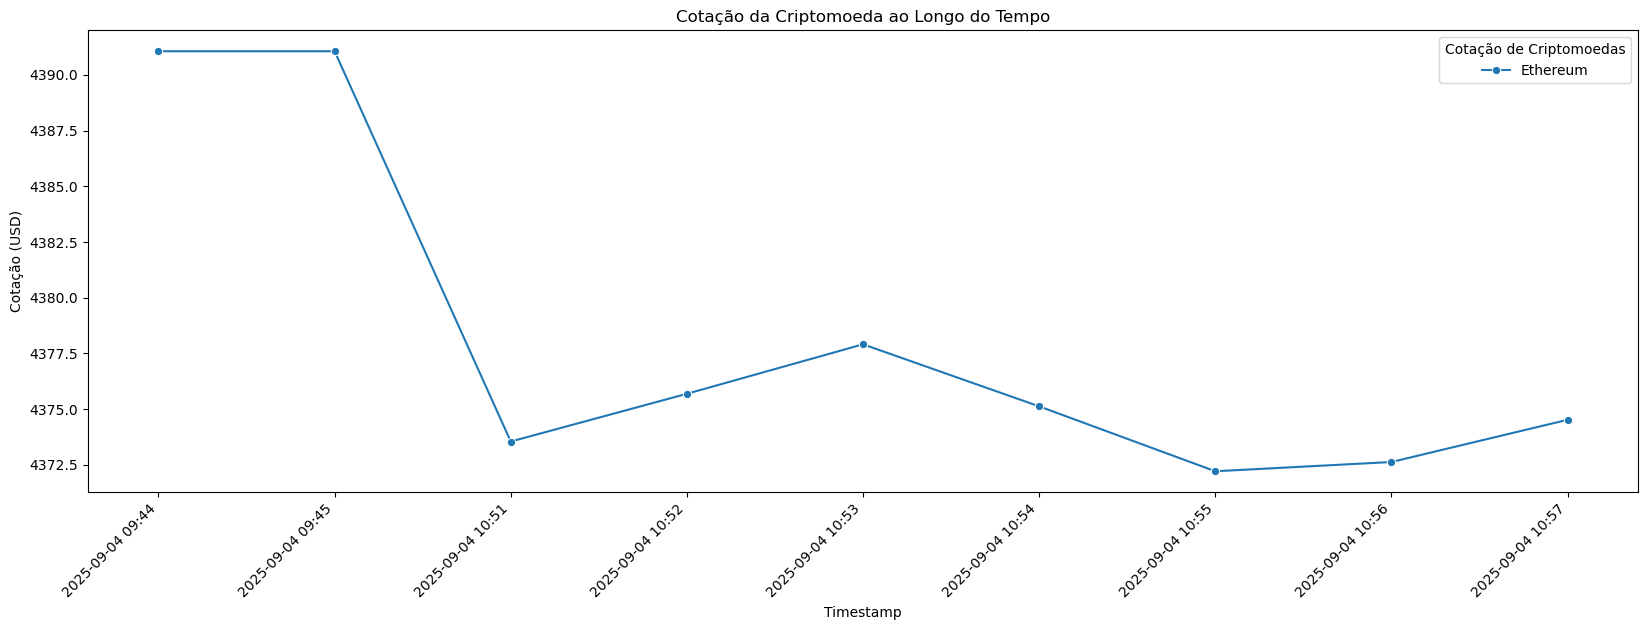

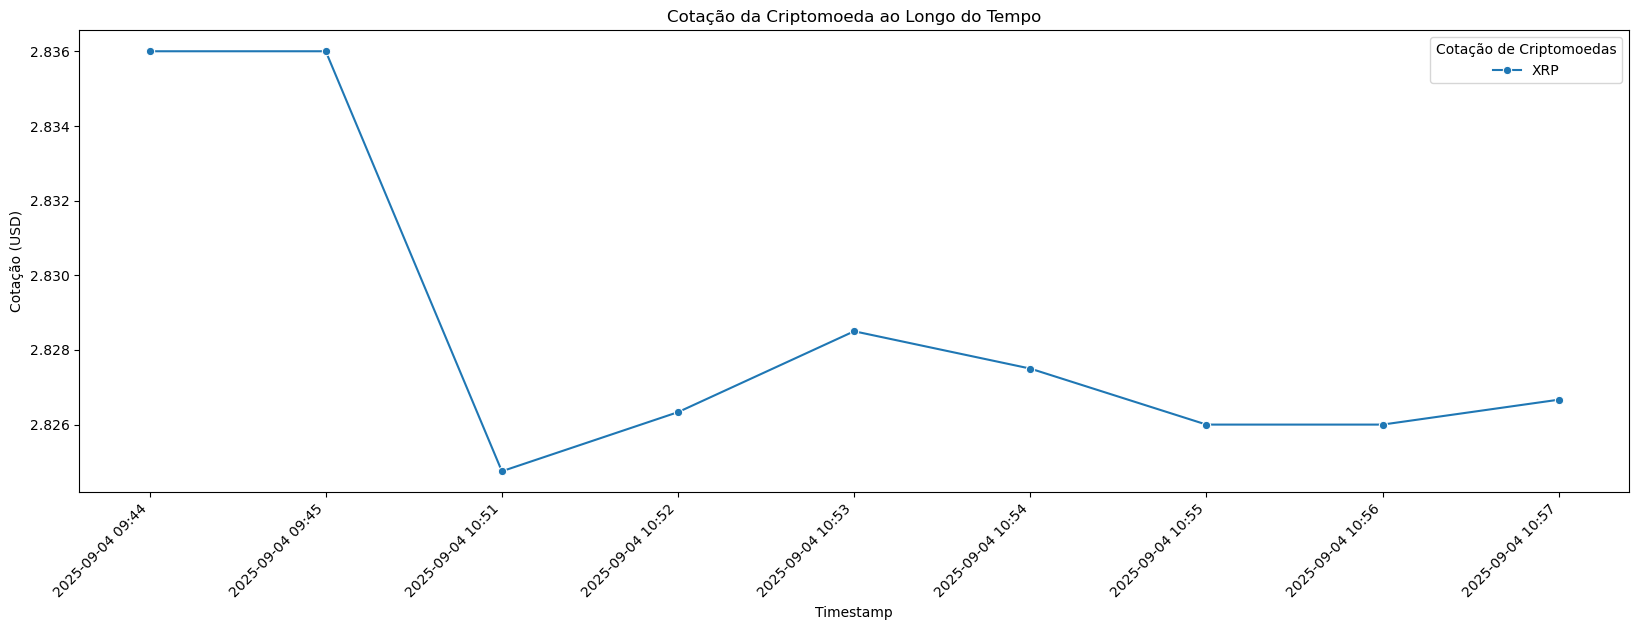

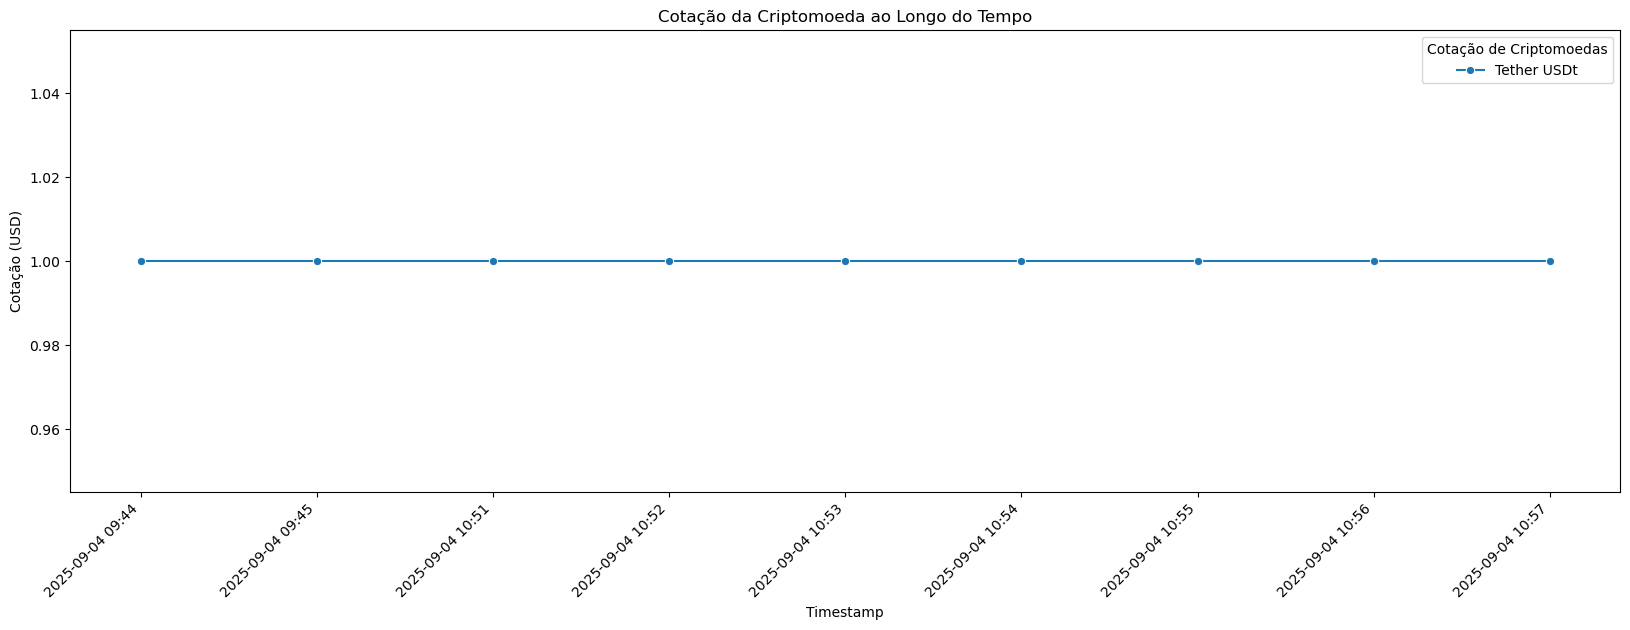

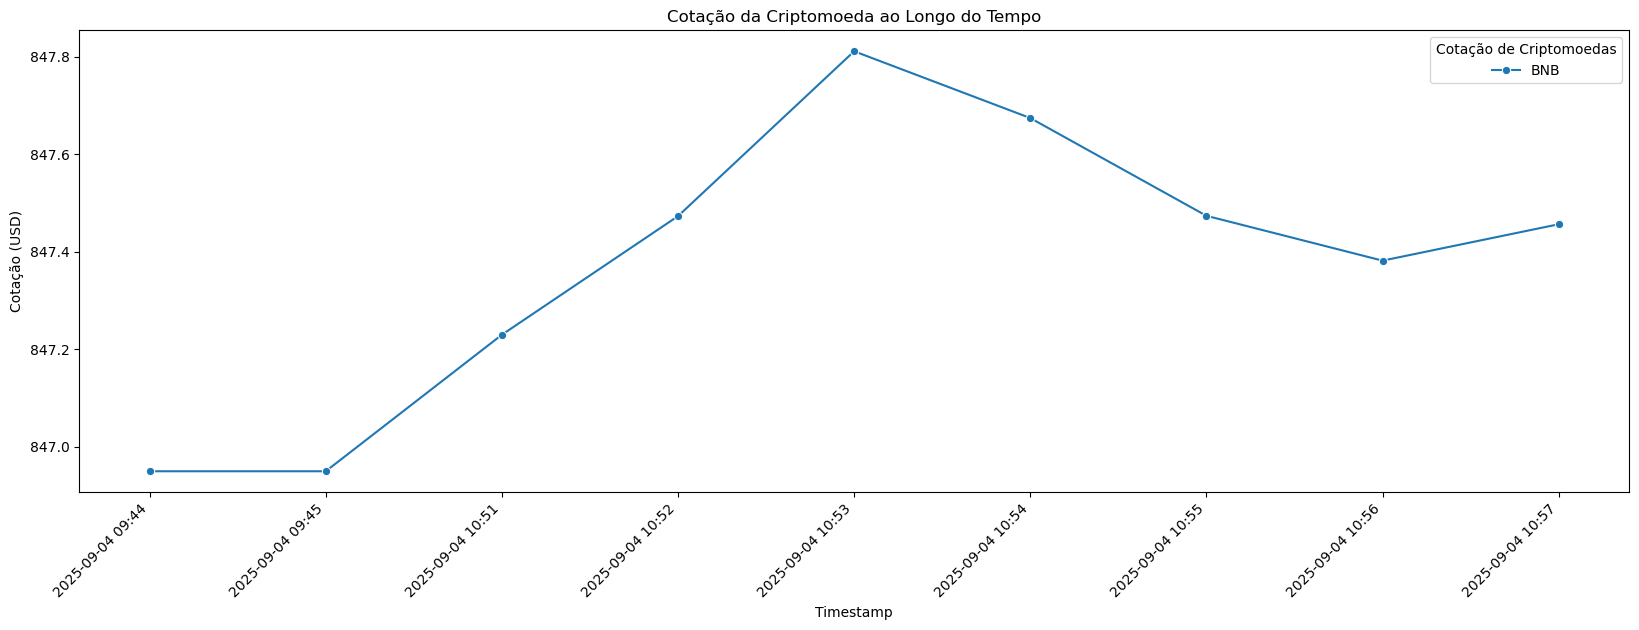

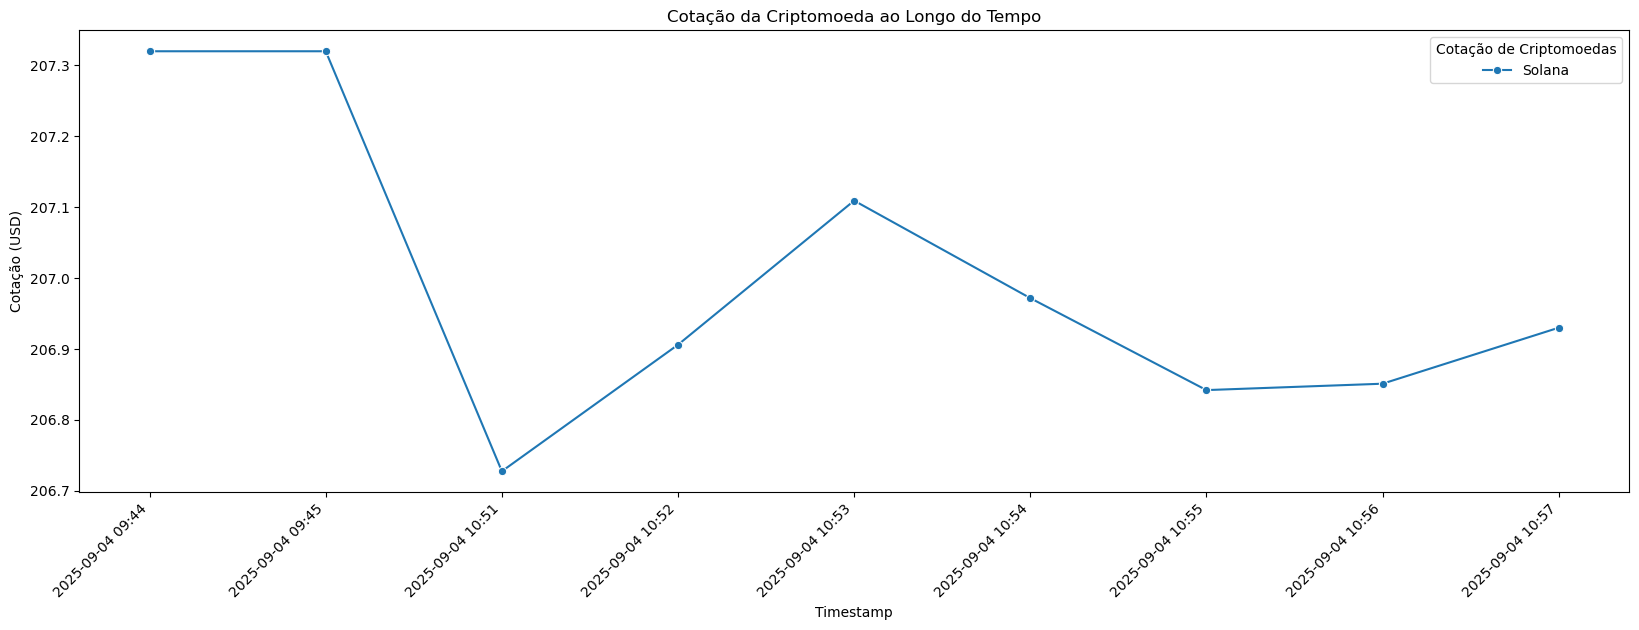

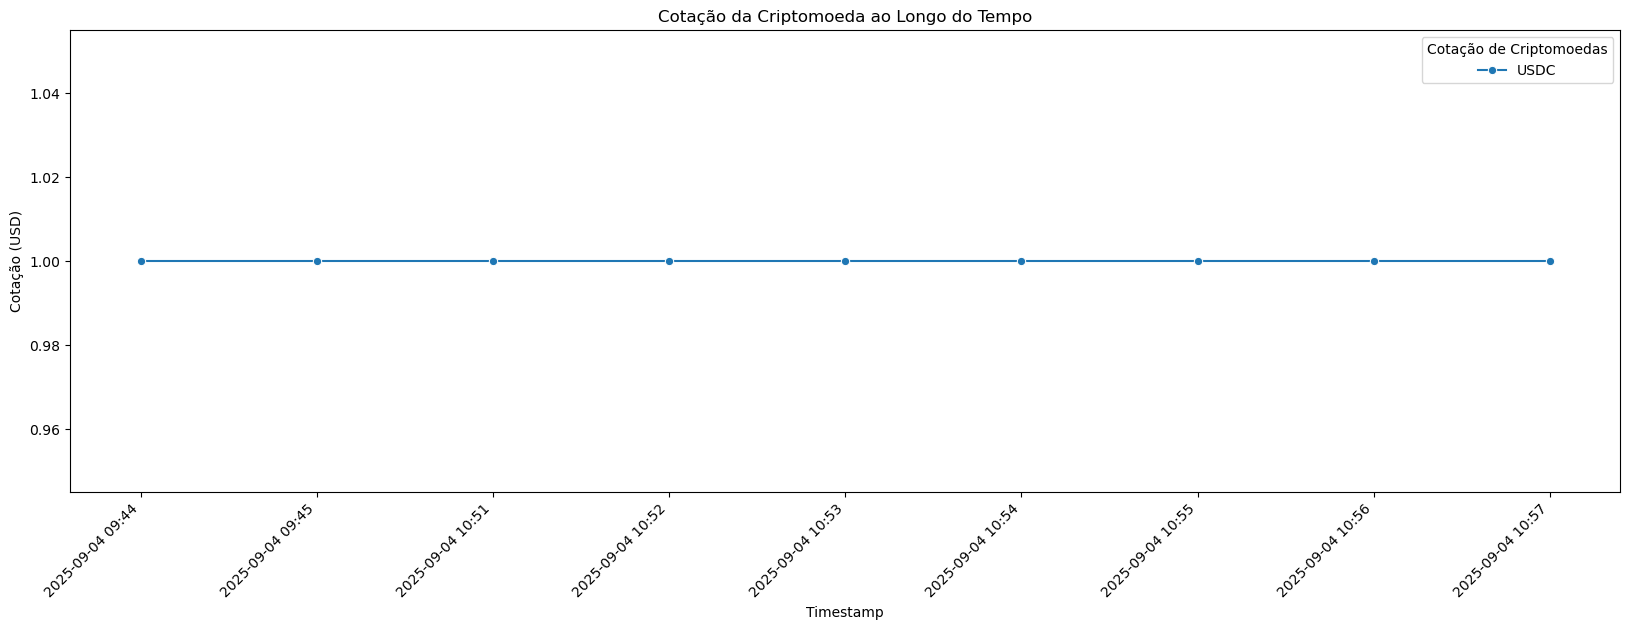

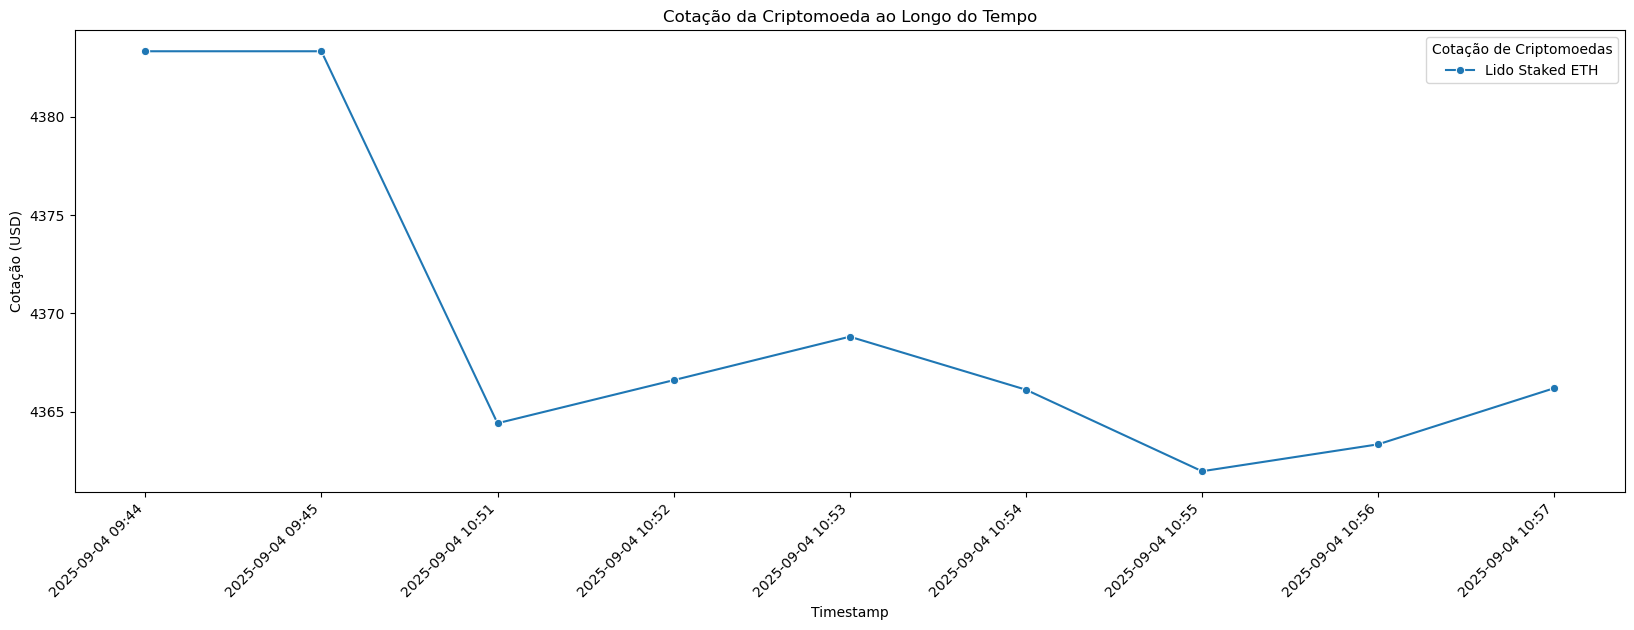

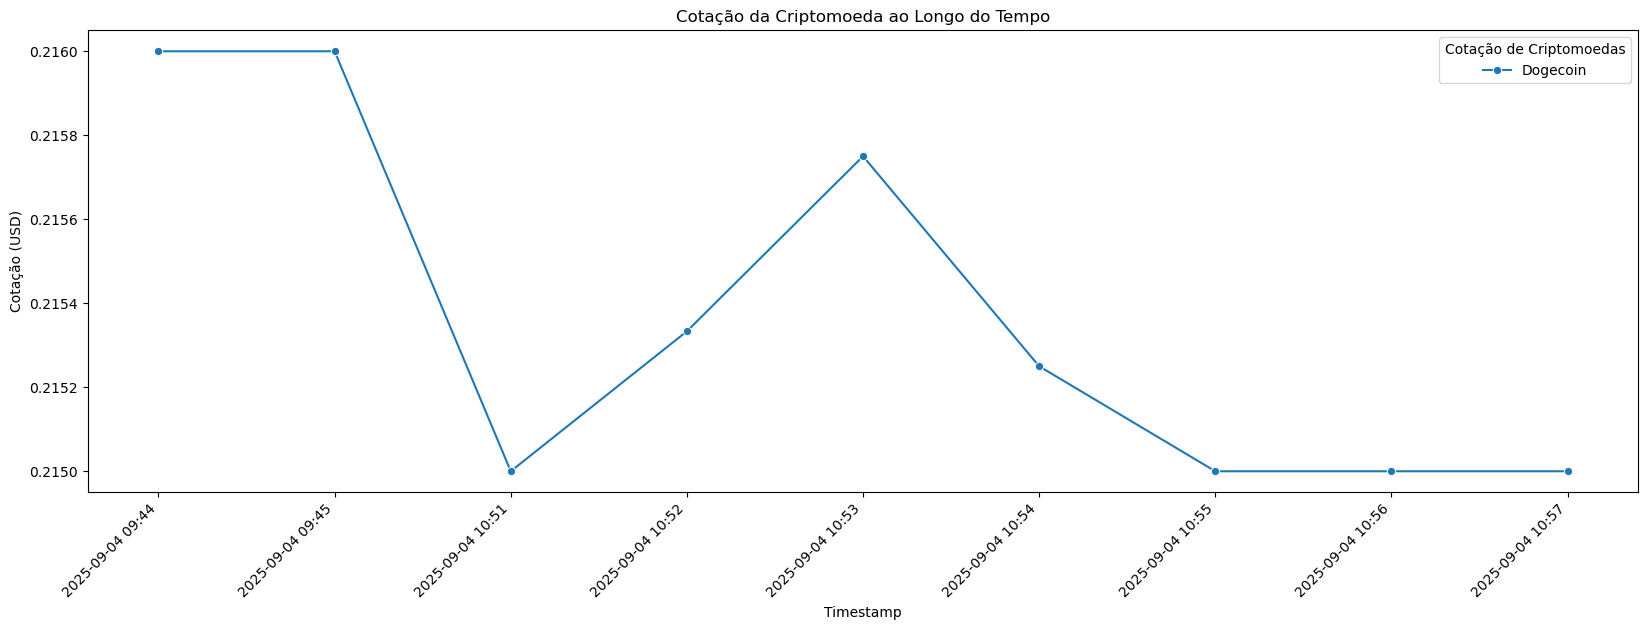

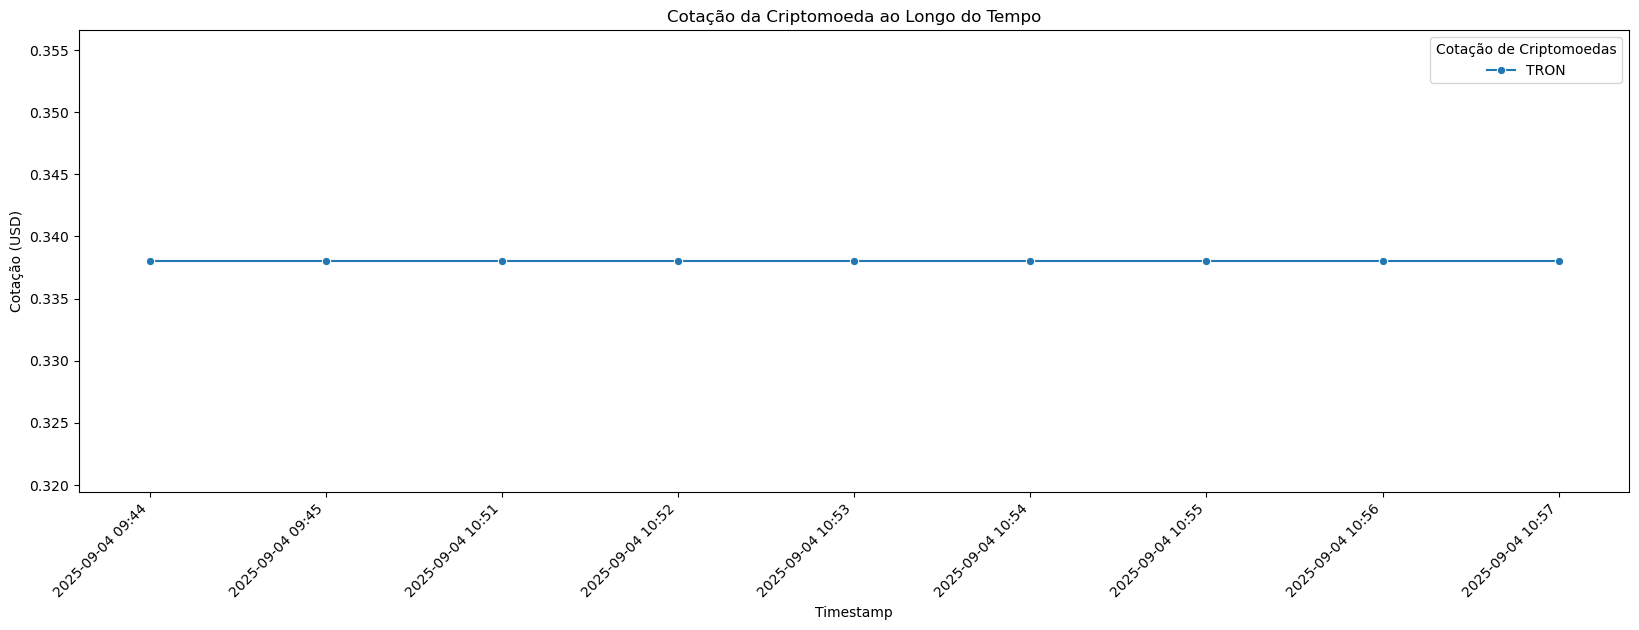

In [13]:
# Obtém os nomes únicos das criptomoedas no DataFrame
currencies = df['name'].unique()

# Itera sobre cada criptomoeda
for currency in currencies:
    
    # Filtra o DataFrame para incluir apenas os dados da criptomoeda atual
    df1 = df[df['name'] == currency].copy()
    
    # Converte a coluna 'timestamp' para o formato de datetime
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    
    # Formata a coluna 'timestamp' para exibir apenas data e hora no formato desejado
    df1['time'] = df1['timestamp'].dt.strftime('%Y-%m-%d %H:%M')  
    
    # Cria uma nova figura para o gráfico, definindo seu tamanho
    plt.figure(figsize = (20, 6))
    
    # Gera um gráfico de linha para a criptomoeda atual, mostrando o preço ao longo do tempo
    sns.lineplot(data = df1, x = 'time', y = 'price', marker = 'o', label = currency, errorbar = None)
    
    # Adiciona uma legenda com título ao gráfico
    plt.legend(title = "Cotação de Criptomoedas")
    
    # Rotaciona os rótulos do eixo x para melhorar a visualização
    plt.xticks(rotation = 45, ha = 'right')
    
    # Define o rótulo do eixo x como 'Timestamp'
    plt.xlabel('Timestamp')
    
    # Define o rótulo do eixo y como 'Cotação (USD)'
    plt.ylabel('Cotação (USD)')
    
    # Define o título do gráfico
    plt.title('Cotação da Criptomoeda ao Longo do Tempo')
    
    # Exibe o gráfico
    plt.show()

Agora vamos construir uma web app com Streamlit.

In [14]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [15]:
#%watermark -v -m

In [16]:
#%watermark --iversions

# Fim